# <a id='toc1_'></a>[**Seminar**: Topics in Sovereign Debt](#toc0_)
## <a id='toc1_1_'></a>[**Soveriegn Debt and Income:** New Evidence for Low- and Middle-Income African Countries](#toc0_)

This project aims to create a dynamic threshold model to analyze when a country's debt starts to hamper growth in GDP. 


**Table of contents**<a id='toc0_'></a>    
- [**Seminar**: Topics in Sovereign Debt](#toc1_)    
  - [**Soveriegn Debt and Income:** New Evidence for Low- and Middle-Income African Countries](#toc1_1_)    
    - [1. Exploratory Data Analysis (EDA)](#toc1_1_1_)    
      - [Descriptive Statistics](#toc1_1_1_1_)    
      - [Visualizations](#toc1_1_1_2_)    
      - [Dynamic Exploratory Data Analysis](#toc1_1_1_3_)    
    - [2. Baseline Model](#toc1_1_2_)    
    - [3. Nonlinearity Check](#toc1_1_3_)    
    - [4.Dynamic Threshold Model](#toc1_1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_1_'></a>[1. Exploratory Data Analysis (EDA)](#toc0_)
- Descriptive statistics
- Data visualization
- Dynamic exploratory data analysis

In [86]:
## Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # For advanced visualizations
import numpy as np

# load the data
data = pd.read_csv('fin_dataset_africa copy.csv', delimiter=';')

# replace values ",," from the dataset with NaN
data = data.replace('..', np.nan)


#### <a id='toc1_1_1_1_'></a>[Descriptive Statistics](#toc0_)

In [91]:
def calculate_summary_stats(data):
    # Select the last seven columns
    last_seven_cols = data.iloc[:, -7:]

    # Basic statistics
    basic_stats = last_seven_cols.describe()

    # Calculate the percentage of missing values for the last seven columns
    missing_percentage = last_seven_cols.isnull().mean() * 100

    # Add the missing values percentage as a new row to the basic_stats DataFrame
    basic_stats.loc['missing %'] = missing_percentage

    # Ensure the 'count' row is adjusted to reflect non-missing values only
    basic_stats.loc['count'] = basic_stats.loc['count'] - (basic_stats.loc['count'] * basic_stats.loc['missing %'] / 100)    
    
    # Convert the combined stats to LaTeX format
    latex_output = basic_stats.to_latex()

    # Saving the LaTeX output to a file
    with open('statistics_description.tex', 'w') as f:
        f.write(latex_output)

    # Optionally print the LaTeX output to check
    print(latex_output)

calculate_summary_stats(data)


\begin{tabular}{llllllll}
\toprule
{} & Foreign direct investment net inflows (\% of GDP) & GDP per capita growth (annual \%) & Gross capital formation (\% of GDP) & Gross national expenditure (\% of GDP) & Net barter terms of trade index (2015 = 100) & Population growth (annual \%) & Trade (\% of GDP) \\
\midrule
count     &                                       841.421053 &                       847.194079 &                         630.004386 &                            618.422149 &                                   770.004386 &                   910.001096 &       655.185307 \\
unique    &                                              598 &                              620 &                                669 &                                   680 &                                          732 &                          342 &              745 \\
top       &                                             1.35 &                             2.67 &                                  0 &    

/var/folders/zn/8wl2ftxd7sg0pjvzvx59s5xr0000gn/T/ipykernel_23229/2727066019.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_output = basic_stats.to_latex()


#### <a id='toc1_1_1_2_'></a>[Visualizations](#toc0_)
Should maybe be adjusted to individual countries. 

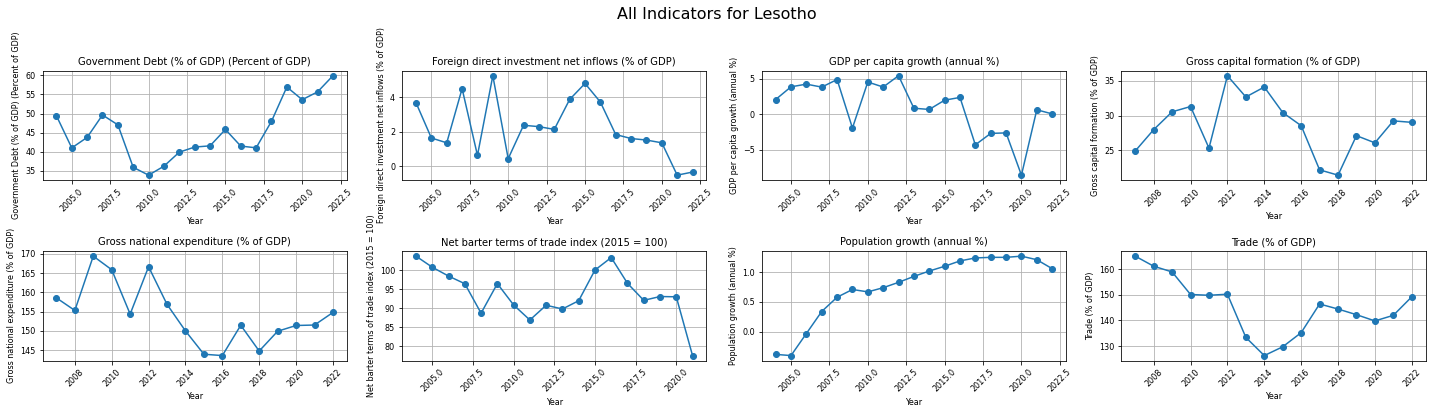

In [101]:
def visualize_indicators_grid(country_name):
    """
    Visualizes all indicators from column 3 onwards for the specified country in a grid format.

    Parameters:
    - country_name: The name of the country.
    """
    # Filter the data for the specified country and ensure the 'Year' column is numeric
    country_data = data[data['Country Name'] == country_name].copy()
    country_data['Year'] = pd.to_numeric(country_data['Year'])
    
    # Get all indicators from column 3 onwards
    indicators = data.columns[2:]
    n_indicators = len(indicators)
    
    # Determine the grid size
    rows = int(n_indicators**0.5)
    cols = int(n_indicators / rows) + (n_indicators % rows > 0)
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*3))
    fig.suptitle(f'All Indicators for {country_name}', fontsize=16)
    
    # Flatten the axes array for easy indexing
    axes = axes.flatten()
    
    # Iterate through each indicator and plot in the grid
    for i, indicator in enumerate(indicators):
        ax = axes[i]
        country_data[indicator] = pd.to_numeric(country_data[indicator], errors='coerce')
        ax.plot(country_data['Year'], country_data[indicator], marker='o', linestyle='-')
        ax.set_title(indicator, fontsize=10)
        ax.set_xlabel('Year', fontsize=8)
        ax.set_ylabel(indicator, fontsize=8)
        ax.tick_params(axis='x', labelrotation=45)
        ax.tick_params(axis='both', labelsize=8)
        ax.grid(True)
    
    # Hide any unused axes if the number of indicators doesn't fill the last row
    for j in range(i + 1, rows * cols):
        axes[j].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the main title
    plt.show()

# Visualize all indicators for Angola in a grid format
visualize_indicators_grid('Lesotho')


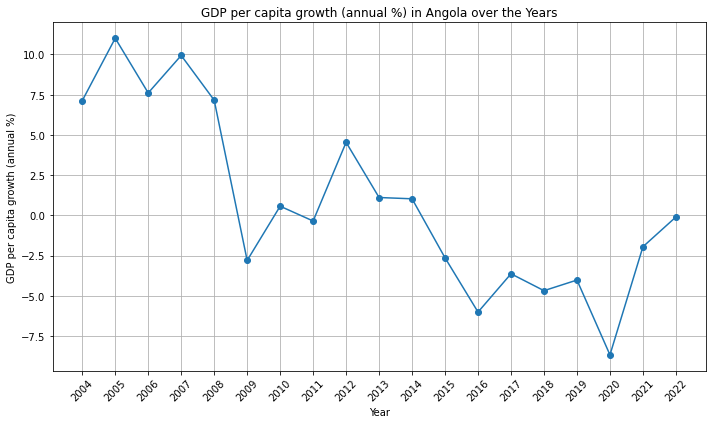

In [95]:
def visualize_country_data_fixed(country_name, indicator):
    """
    Visualizes the given indicator over the years for the specified country with fixed axes.

    Parameters:
    - country_name: The name of the country.
    - indicator: The specific indicator to visualize.
    """
    # Filter the data for the specified country and ensure numeric types
    country_data = data[data['Country Name'] == country_name].copy()
    country_data['Year'] = pd.to_numeric(country_data['Year'])
    country_data[indicator] = pd.to_numeric(country_data[indicator], errors='coerce')
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(country_data['Year'], country_data[indicator], marker='o')
    
    # Adding title and labels with improved axes
    plt.title(f'{indicator} in {country_name} over the Years')
    plt.xlabel('Year')
    plt.xticks(country_data['Year'].unique(), rotation=45)  # Ensure all years are shown and rotated for readability
    plt.ylabel(indicator)
    
    # Display the plot
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to not cut off labels
    plt.show()

# Attempt to visualize again with corrections
visualize_country_data_fixed('Angola', 'GDP per capita growth (annual %)')


### <a id='toc1_1_2_'></a>[2. Baseline Model](#toc0_)
- Simple OLS regression
- Bulding-blocks for a dynamic threshold model

In [ ]:
import statsmodels.api as sm

# Assuming your variables are in the 'data' DataFrame
model = sm.OLS(data['Real GDP growth annual'], 
               data[['Debt Ratio to GDP', 'Trade openess', 'inflation', 'Government Effectiveness']])  
results = model.fit()
print(results.summary())


# Set the threshold value
x = 0.05

# Check if any p-value is less than x
if any(results.pvalues < x):
    print("There is at least one coefficient with a p-value less than", x)
else:
    print("All coefficients have p-values greater than or equal to", x)


### <a id='toc1_1_3_'></a>[3. Nonlinearity Check](#toc0_)
- Nonlinearity check
- Ramsey Reset


In [ ]:
import matplotlib.pyplot as plt

# Fit your baseline linear model from the previous step (if you haven't already)
# ... 

plt.figure(figsize=(8, 5))
plt.scatter(results.fittedvalues, results.resid) 
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()


In [ ]:
import statsmodels.formula.api as smf

# Assuming your fitted model is in  'results'

# 1. Get base restricted model  (your linear model in this case)
restricted_model = results

# 2. Create a more flexible unrestricted model 
unrestricted_model = smf.ols(formula="Real_GDP_Growth ~ Debt_Ratio_to_GDP + Trade_openess + Inflation + Government_Effectiveness + Debt_Ratio_to_GDP_Squared + I(Debt_Ratio_to_GDP_Squared * Debt_Ratio_to_GDP_Squared)", data=data).fit() 

# 3. Calculate the F-statistic
f_stat = ((restricted_model.ssr - unrestricted_model.ssr) / (unrestricted_model.df_resid - restricted_model.df_resid)) / (restricted_model.ssr / restricted_model.df_resid)

# 4. Calculate the p-value (you'll need scipy)
from scipy.stats import f
p_value = 1 - f.cdf(f_stat, unrestricted_model.df_resid - restricted_model.df_resid, restricted_model.df_resid)

# 5. Print the results
print(f"RESET Test F-statistic: {f_stat}")
print(f"RESET Test p-value: {p_value}") 


### <a id='toc1_1_4_'></a>[4. Dynamic Threshold Model](#toc0_)
- Building the model
- Estimation
- Interpretation

First set possible threshold values. Then estimate the model.

In [ ]:
potential_threshold = 60  

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split 

def split_data(data, threshold, target_var):
    data_below = data[data['Debt_Ratio_to_GDP'] <= threshold]
    data_above = data[data['Debt_Ratio_to_GDP'] > threshold]
    return data_below, data_above

threshold_values = np.arange(20, 90, 0.1)  # Range to explore
best_fit = 0  
best_threshold = None

for threshold in threshold_values:
    data_below, data_above = split_data(data, threshold, 'Real_GDP_Growth')

    formula = 'Real_GDP_Growth ~ Debt_Ratio_to_GDP + Trade_openess + Inflation + Government_Effectiveness' # Define the formula string here 

    model_below = smf.ols(formula=formula, data=data_below).fit()
    model_above = smf.ols(formula=formula, data=data_above).fit()

    current_fit = model_below.rsquared + model_above.rsquared  

    if current_fit > best_fit: 
        best_fit = current_fit
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}") 


